In [148]:
import rasterio
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot

/var/folders/rs/3ty1b9fj1kj0_cq_xv6bzkdm0000gn/T/ipykernel_66054/2242116344.py:2: RuntimeWarning: overflow encountered in multiply
  lidar_elevation = lidar.read(1)*3.5
/var/folders/rs/3ty1b9fj1kj0_cq_xv6bzkdm0000gn/T/ipykernel_66054/2242116344.py:6: RuntimeWarning: invalid value encountered in subtract
  normalised_lidar = (lidar_elevation - elevation_min)/(elevation_max - elevation_min)
/var/folders/rs/3ty1b9fj1kj0_cq_xv6bzkdm0000gn/T/ipykernel_66054/2242116344.py:6: RuntimeWarning: invalid value encountered in divide
  normalised_lidar = (lidar_elevation - elevation_min)/(elevation_max - elevation_min)


[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[ 99.00101   98.938     99.0885   ...  95.09501   96.36201   96.6945  ]
 [ 99.067505  99.109505  99.29851  ...  94.440506  93.93301   94.0835  ]
 [101.374     99.24251  102.567505 ...  91.18201  100.27501  100.1945  ]
 ...
 [ 59.9725    60.063503  60.340004 ...  76.359505  76.331505  76.258   ]
 [ 60.000504  60.0215    60.662003 ...  76.331505  76.289505  76.29651 ]
 [ 60.014503  59.979504  61.075005 ...  76.149506  76.079506  76.083   ]]


/var/folders/rs/3ty1b9fj1kj0_cq_xv6bzkdm0000gn/T/ipykernel_66054/2242116344.py:26: RuntimeWarning: invalid value encountered in multiply
  new_red = image_array1[:, :, 0] * ratio
/var/folders/rs/3ty1b9fj1kj0_cq_xv6bzkdm0000gn/T/ipykernel_66054/2242116344.py:27: RuntimeWarning: invalid value encountered in multiply
  new_green = image_array1[:, :, 1] * ratio
/var/folders/rs/3ty1b9fj1kj0_cq_xv6bzkdm0000gn/T/ipykernel_66054/2242116344.py:30: RuntimeWarning: invalid value encountered in cast
  pansharpened_image = Image.fromarray(pansharpened_array.astype(np.uint8))


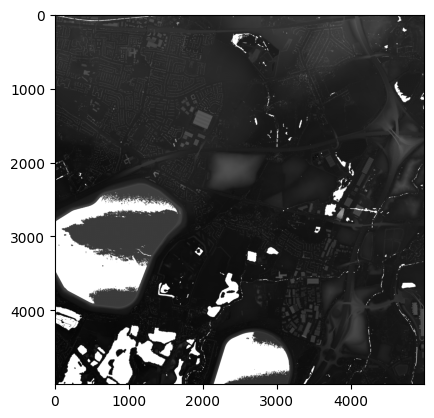

In [150]:

lidar = rasterio.open('imgdata/DSM_TQ0075_P_12757_20230109_20230315.tif')
lidar_elevation = lidar.read(1)*3.5

elevation_max = np.max(lidar_elevation)
elevation_min = np.min(lidar_elevation)
normalised_lidar = (lidar_elevation - elevation_min)/(elevation_max - elevation_min)
print(normalised_lidar)

pyplot.imshow(lidar_elevation, cmap = 'grey')
print(lidar_elevation)

def dimensions(path):
   
    image = Image.open(path)
    width, height = image.size
    if (width/height) == 1:
        image = image.resize((5000,5000))
    else:
        image = image.resize((5000,5000))
    return image 

def pansharpen(image_array1, image_array2):
    rgb_values = np.array([0.299, 0.587, 0.114])
    psuedo_pan_array = np.true_divide((image_array1*rgb_values).sum(axis=2), rgb_values.sum())
    ratio = image_array2/psuedo_pan_array
    new_red = image_array1[:, :, 0] * ratio
    new_green = image_array1[:, :, 1] * ratio
    new_blue = image_array1[:, :, 2] * ratio
    pansharpened_array = np.stack([new_red, new_green, new_blue], axis=2)
    pansharpened_image = Image.fromarray(pansharpened_array.astype(np.uint8))
    return pansharpened_image


image1 = dimensions('imgdata/20230215-SE2B-CGG-GBR-MS3-L3-RGB-preview.jpg')
image1.load()

data1 = np.asarray(image1, dtype="int32")
data2 = lidar_elevation

panimage = pansharpen(data1, data2)
panimage.show()


### 